# K-Nearest Neighbors and Feature Scaling

Goals:

- Learn about the K-Nearest Neighbors machine learning algorithm. How it works and how to use it.
- Use the KNN model on the 2016 Democratic dataset.
- Feature engineering continued: scaling data with standard and minmax scalers.
- How and when to use scaling for you data.
- Class work: compare and contrast KNN and decision tree models on classification supervised learning datasets

## K-Nearest Neighbors

- Known as the "easy" machine learning model
- Classifies an event based on its closest relatives in the data the model has been trained on. Hence the term "Nearest Neighbors". K = number of neighbors.
- Known as a voting classifier because n neighbors vote for the classification.
- Uses Euclidean Distance to calculate similarity.
- Pros: Fast, intuitive, easy to interpret, ability to make probabilities.
- Cons: Poor at handling many features, especially "noisy" features because it treats every feature equally. Not good with small sample sizes. Usually requires scaling.

![ED](https://4.bp.blogspot.com/-UDuXTjw5pbw/WkZ_Yt7qrWI/AAAAAAAAARw/BWh39dRCPzwP1jowVg9lSOH8yfHvrv1lQCLcBGAs/s1600/euclidian.PNG)

Source: Sumit Jha

In [1]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier

plt.style.use('fivethirtyeight')

/Users/roahuja/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#Fake data time
data = make_classification(n_samples=200, 
                           n_features=2, 
                           n_informative=2, 
                           n_redundant=0, 
                           n_classes=2, 
                           class_sep=0.35, 
                           random_state=5)

In [3]:
#Slice the features and target variable from data

X = data[0]
y = data[1]

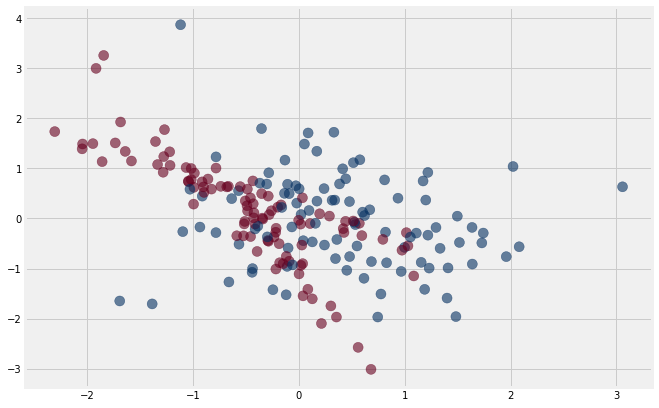

In [4]:
#Plot the data with its color-encodings
plt.figure(figsize=(10,7))
plt.scatter(X[:,0], X[:,1], c=y, cmap="RdBu", alpha=0.6, s=100)

Time to use K-Nearest Neighbors (KNN) to model this data.

Train a KNN model using 3 neighbors

In [5]:
#intialize model and set n_neighbors equal to 3
knn3 = KNeighborsClassifier(n_neighbors=3)

#Fit the model on the "fake data"
knn3.fit(X,y)

#Find the accuracy score of the model on the data
score = knn3.score(X,y)

print ("The model accurately labelled {:.2f} percent of the data".format(score))

The model accurately labelled 0.90 percent of the data


Now with 5 neighbors

In [6]:
#intialize model and set n_neighbors equal to 5
knn5 = KNeighborsClassifier(n_neighbors=5)

#Fit the model on the "fake data"
knn5.fit(X,y)

#Find the accuracy score of the model on the data
score = knn5.score(X,y)

print ("The model accurately labelled {:.2f} percent of the data".format(score))

The model accurately labelled 0.85 percent of the data


Apply model on a new point

In [7]:
#New data point
new_data = np.asarray([0.18, 0.15])
new_data.shape

(2,)

In [8]:
new_data = new_data.reshape(1,-1)
new_data.shape

(1, 2)

In [9]:
new_data

array([[0.18, 0.15]])

In [10]:

#Make predictions on new_data using both models
pred3 = knn3.predict(new_data)
pred5 = knn5.predict(new_data)

#Call those predictions
print ("The knn3 model thinks new_data belongs to class {}".format(pred3[0]))
print ("The knn5 model thinks new_data belongs to class {}".format(pred5[0]))

The knn3 model thinks new_data belongs to class 0
The knn5 model thinks new_data belongs to class 1


Look at class probabilities

In [11]:
#Use predict_proba to find class probabilities on new_data
knn3.predict_proba(new_data)

array([[0.66666667, 0.33333333]])

In [12]:
#For 5 neighbors
knn5.predict_proba(new_data)

array([[0.4, 0.6]])

These probabilites are the vote percentages.

Visualize new point in relation to data

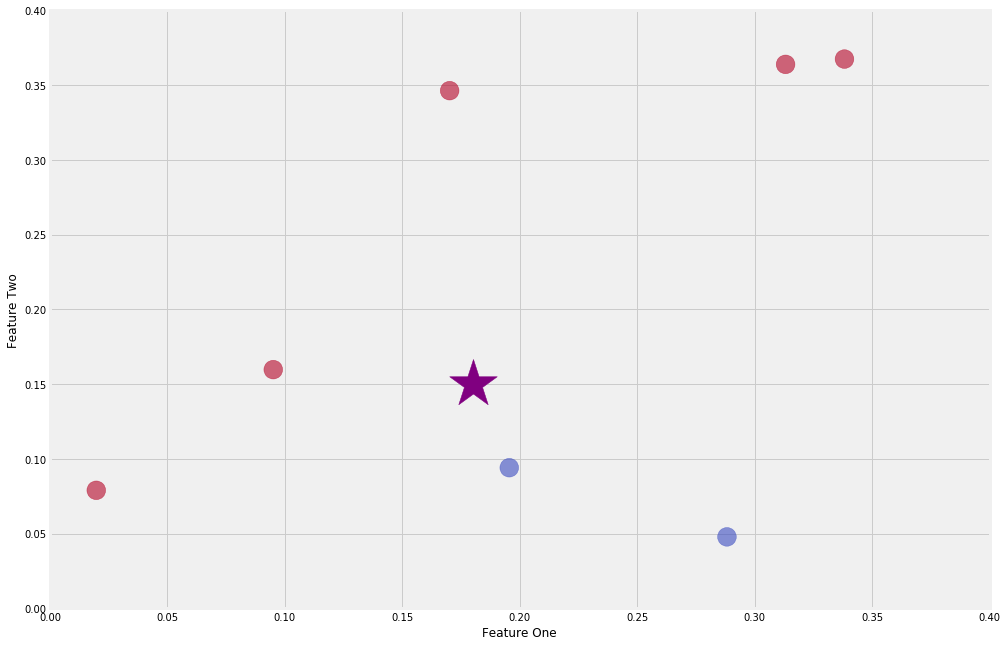

In [13]:
plt.figure(figsize=(15,11))
plt.xlim(0,0.4)
plt.ylim(0,.4)
plt.scatter(X[:,0], X[:,1], c=y, cmap = "coolwarm", s=350, alpha=0.6)
#Plot of new_data point
plt.scatter([0.18], [0.15], c="purple",marker="*", s= 2500)
plt.xlabel("Feature One")
plt.ylabel("Feature Two");

Classify the purple star using the KNN method.

Visualizing KNN

In [14]:
#Load in the plot_decision_boundary function
def plot_decision_boundary(model, X, y, n_neighbors):
    X_max = X.max(axis=0)
    X_min = X.min(axis=0)
    xticks = np.linspace(X_min[0], X_max[0], 100)
    yticks = np.linspace(X_min[1], X_max[1], 100)
    xx, yy = np.meshgrid(xticks, yticks)
    ZZ = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = ZZ >= 0.5
    Z = Z.reshape(xx.shape)
    fig, ax = plt.subplots()
    ax = plt.gca()
    ax.contourf(xx, yy, Z, cmap="RdBu", alpha=0.2)
    ax.scatter(X[:,0], X[:,1], c=y, cmap = "RdBu",s=100, alpha=0.4)
    plt.rcParams['figure.figsize']=(15,8)
    plt.title("Plot of {} neighbors".format(n_neighbors))
    plt.xlabel("Feature One")
    plt.ylabel("Feature Two")

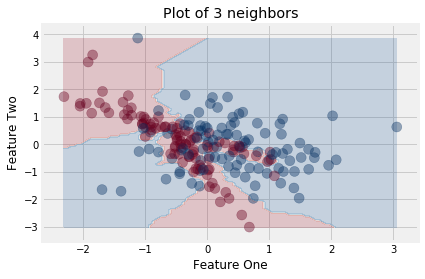

In [15]:
#Visualize the knn3 model
plot_decision_boundary(knn3, X, y, 3)

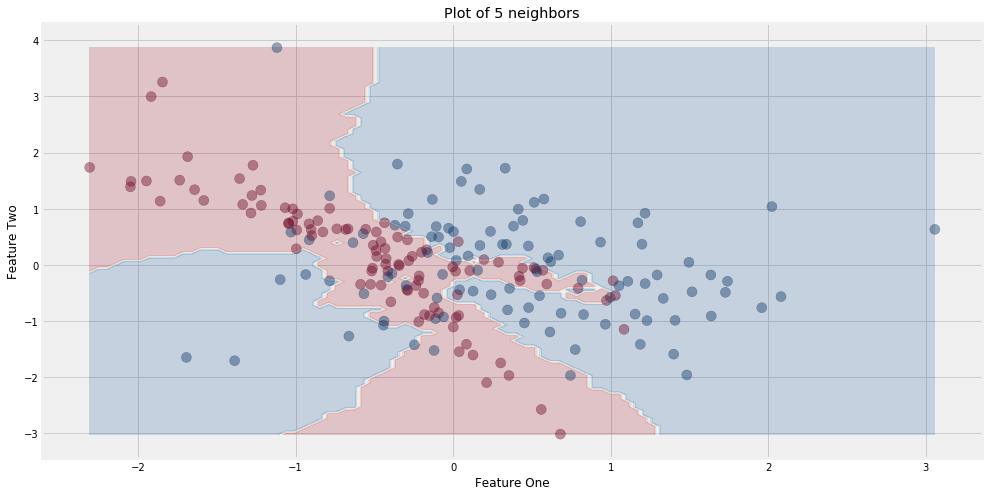

In [16]:
#Visualize the knn5 model
plot_decision_boundary(knn5, X, y, 5)

13 neighbors

In [17]:
#Plot 13 neighbors
#Fit model first before you plot

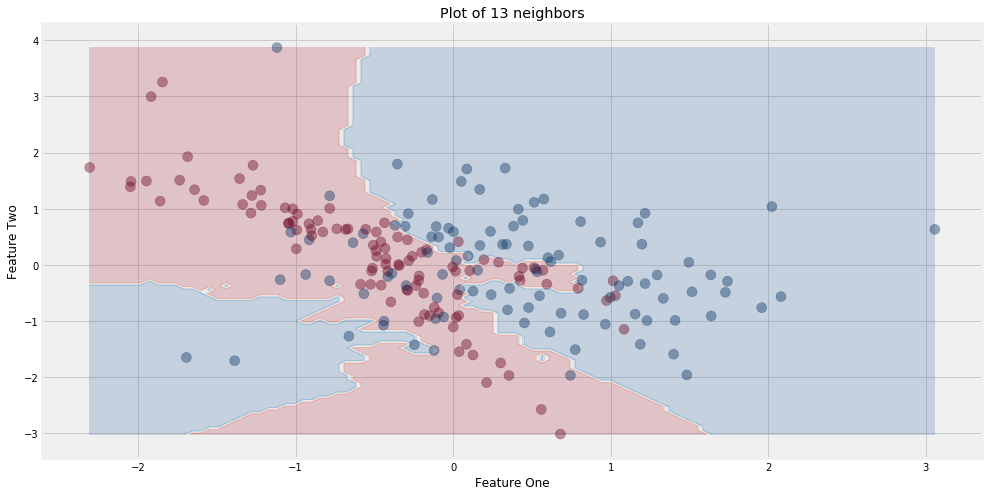

In [18]:
knn13 = KNeighborsClassifier(n_neighbors=13)
knn13.fit(X, y)
plot_decision_boundary(knn13, X, y, 13)

25 neighbors! 

In [19]:
#Plot 25 neighbors
#Fit model first before you plot

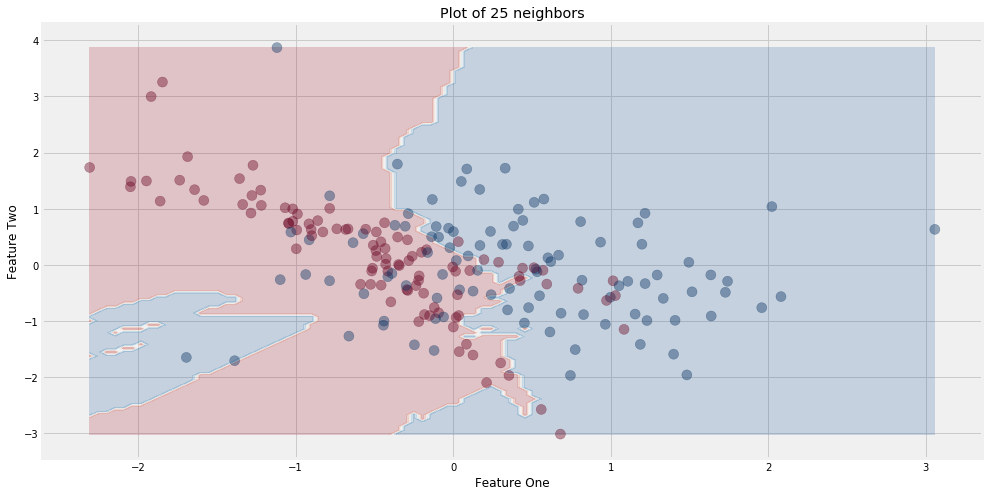

In [20]:
knn25 = KNeighborsClassifier(n_neighbors=25)
knn25.fit(X, y)
plot_decision_boundary(knn25, X, y, 25)

## 2016 Democratic Primary Data

### Data cleaning

Dataset: County-level results of 2016 Democratic Primary and county demographic information.

Kaggle page: https://www.kaggle.com/benhamner/2016-us-election

In [21]:
#Load in data files
primary = pd.read_csv("../../data/primary_data//primary_results.csv")
county = pd.read_csv("../../data/primary_data/county_facts.csv")
county_dict = pd.read_csv("../../data/primary_data/county_facts_dictionary.csv")

Before we can clean model, we have to clean first, but I've already done the work on that already.

In [22]:
primary.head()

,state,state_abbreviation,county,fips,party,candidate,votes,fraction_votes
0,Alabama,AL,Autauga,1001.0,Democrat,Bernie Sanders,544,0.182
1,Alabama,AL,Autauga,1001.0,Democrat,Hillary Clinton,2387,0.800
2,Alabama,AL,Baldwin,1003.0,Democrat,Bernie Sanders,2694,0.329
3,Alabama,AL,Baldwin,1003.0,Democrat,Hillary Clinton,5290,0.647
4,Alabama,AL,Barbour,1005.0,Democrat,Bernie Sanders,222,0.078


In [23]:
county.head()

,fips,area_name,state_abbreviation,PST045214,PST040210,PST120214,POP010210,AGE135214,AGE295214,AGE775214,...,SBO415207,SBO015207,MAN450207,WTN220207,RTN130207,RTN131207,AFN120207,BPS030214,LND110210,POP060210
0,0,United States,NaN,318857056,308758105,3.3,308745538,6.2,23.1,14.5,...,8.3,28.8,5319456312,4174286516,3917663456,12990,613795732,1046363,3531905.43,87.4
1,1000,Alabama,NaN,4849377,4780127,1.4,4779736,6.1,22.8,15.3,...,1.2,28.1,112858843,52252752,57344851,12364,6426342,13369,50645.33,94.4
2,1001,Autauga County,AL,55395,54571,1.5,54571,6.0,25.2,13.8,...,0.7,31.7,0,0,598175,12003,88157,131,594.44,91.8
3,1003,Baldwin County,AL,200111,182265,9.8,182265,5.6,22.2,18.7,...,1.3,27.3,1410273,0,2966489,17166,436955,1384,1589.78,114.6
4,1005,Barbour County,AL,26887,27457,-2.1,27457,5.7,21.2,16.5,...,0.0,27.0,0,0,188337,6334,0,8,884.88,31.0


In [24]:
county_dict.head()

,column_name,description
0,PST045214,"Population, 2014 estimate"
1,PST040210,"Population, 2010 (April 1) estimates base"
2,PST120214,"Population, percent change - April 1, 2010 to ..."
3,POP010210,"Population, 2010"
4,AGE135214,"Persons under 5 years, percent, 2014"


In [25]:
# primary.groupby('state').count()

In [26]:
county.columns


Index(['fips', 'area_name', 'state_abbreviation', 'PST045214', 'PST040210',
       'PST120214', 'POP010210', 'AGE135214', 'AGE295214', 'AGE775214',
       'SEX255214', 'RHI125214', 'RHI225214', 'RHI325214', 'RHI425214',
       'RHI525214', 'RHI625214', 'RHI725214', 'RHI825214', 'POP715213',
       'POP645213', 'POP815213', 'EDU635213', 'EDU685213', 'VET605213',
       'LFE305213', 'HSG010214', 'HSG445213', 'HSG096213', 'HSG495213',
       'HSD410213', 'HSD310213', 'INC910213', 'INC110213', 'PVY020213',
       'BZA010213', 'BZA110213', 'BZA115213', 'NES010213', 'SBO001207',
       'SBO315207', 'SBO115207', 'SBO215207', 'SBO515207', 'SBO415207',
       'SBO015207', 'MAN450207', 'WTN220207', 'RTN130207', 'RTN131207',
       'AFN120207', 'BPS030214', 'LND110210', 'POP060210'],
      dtype='object')

In [27]:
bern = primary[primary.candidate== "Bernie Sanders"]
bern.head()


,state,state_abbreviation,county,fips,party,candidate,votes,fraction_votes
0,Alabama,AL,Autauga,1001.0,Democrat,Bernie Sanders,544,0.182
2,Alabama,AL,Baldwin,1003.0,Democrat,Bernie Sanders,2694,0.329
4,Alabama,AL,Barbour,1005.0,Democrat,Bernie Sanders,222,0.078
6,Alabama,AL,Bibb,1007.0,Democrat,Bernie Sanders,246,0.197
8,Alabama,AL,Blount,1009.0,Democrat,Bernie Sanders,395,0.386


In [28]:
bern.count()

state                 4205
state_abbreviation    4205
county                4205
fips                  4195
party                 4205
candidate             4205
votes                 4205
fraction_votes        4205
dtype: int64

In [29]:
hill = primary[primary.candidate== "Hillary Clinton"]
hill.head()


,state,state_abbreviation,county,fips,party,candidate,votes,fraction_votes
1,Alabama,AL,Autauga,1001.0,Democrat,Hillary Clinton,2387,0.800
3,Alabama,AL,Baldwin,1003.0,Democrat,Hillary Clinton,5290,0.647
5,Alabama,AL,Barbour,1005.0,Democrat,Hillary Clinton,2567,0.906
7,Alabama,AL,Bibb,1007.0,Democrat,Hillary Clinton,942,0.755
9,Alabama,AL,Blount,1009.0,Democrat,Hillary Clinton,564,0.551


In [30]:
hill.count()

state                 4205
state_abbreviation    4205
county                4205
fips                  4195
party                 4205
candidate             4205
votes                 4205
fraction_votes        4205
dtype: int64

In [31]:
bern = bern[["fips", "candidate", "votes"]]
bern.head()


,fips,candidate,votes
0,1001.0,Bernie Sanders,544
2,1003.0,Bernie Sanders,2694
4,1005.0,Bernie Sanders,222
6,1007.0,Bernie Sanders,246
8,1009.0,Bernie Sanders,395


In [32]:
bern.count()

fips         4195
candidate    4205
votes        4205
dtype: int64

In [33]:
# dem = pd.merge(hill, bern, on="fips")
# dem.head()
# pd.concat([bern, hill]).isnull().sum()

In [34]:
# dem.count()

In [35]:
dem = pd.merge(hill, bern, on="fips")
dem.head()

,state,state_abbreviation,county,fips,party,candidate_x,votes_x,fraction_votes,candidate_y,votes_y
0,Alabama,AL,Autauga,1001.0,Democrat,Hillary Clinton,2387,0.800,Bernie Sanders,544
1,Alabama,AL,Baldwin,1003.0,Democrat,Hillary Clinton,5290,0.647,Bernie Sanders,2694
2,Alabama,AL,Barbour,1005.0,Democrat,Hillary Clinton,2567,0.906,Bernie Sanders,222
3,Alabama,AL,Bibb,1007.0,Democrat,Hillary Clinton,942,0.755,Bernie Sanders,246
4,Alabama,AL,Blount,1009.0,Democrat,Hillary Clinton,564,0.551,Bernie Sanders,395


In [36]:
dem.count()

state                 4295
state_abbreviation    4295
county                4295
fips                  4195
party                 4295
candidate_x           4295
votes_x               4295
fraction_votes        4295
candidate_y           4295
votes_y               4295
dtype: int64

In [37]:
dem.head()

,state,state_abbreviation,county,fips,party,candidate_x,votes_x,fraction_votes,candidate_y,votes_y
0,Alabama,AL,Autauga,1001.0,Democrat,Hillary Clinton,2387,0.800,Bernie Sanders,544
1,Alabama,AL,Baldwin,1003.0,Democrat,Hillary Clinton,5290,0.647,Bernie Sanders,2694
2,Alabama,AL,Barbour,1005.0,Democrat,Hillary Clinton,2567,0.906,Bernie Sanders,222
3,Alabama,AL,Bibb,1007.0,Democrat,Hillary Clinton,942,0.755,Bernie Sanders,246
4,Alabama,AL,Blount,1009.0,Democrat,Hillary Clinton,564,0.551,Bernie Sanders,395


In [38]:
x=[1,2,3]
y=[4,5,6]
z = zip(x,y)
dict(z)

{1: 4, 2: 5, 3: 6}

In [39]:
county.columns

Index(['fips', 'area_name', 'state_abbreviation', 'PST045214', 'PST040210',
       'PST120214', 'POP010210', 'AGE135214', 'AGE295214', 'AGE775214',
       'SEX255214', 'RHI125214', 'RHI225214', 'RHI325214', 'RHI425214',
       'RHI525214', 'RHI625214', 'RHI725214', 'RHI825214', 'POP715213',
       'POP645213', 'POP815213', 'EDU635213', 'EDU685213', 'VET605213',
       'LFE305213', 'HSG010214', 'HSG445213', 'HSG096213', 'HSG495213',
       'HSD410213', 'HSD310213', 'INC910213', 'INC110213', 'PVY020213',
       'BZA010213', 'BZA110213', 'BZA115213', 'NES010213', 'SBO001207',
       'SBO315207', 'SBO115207', 'SBO215207', 'SBO515207', 'SBO415207',
       'SBO015207', 'MAN450207', 'WTN220207', 'RTN130207', 'RTN131207',
       'AFN120207', 'BPS030214', 'LND110210', 'POP060210'],
      dtype='object')

In [40]:
county.columns[[0,3,5,9,10,12,18,20,23,25,33,34,53]]

Index(['fips', 'PST045214', 'PST120214', 'AGE775214', 'SEX255214', 'RHI225214',
       'RHI825214', 'POP645213', 'EDU685213', 'LFE305213', 'INC110213',
       'PVY020213', 'POP060210'],
      dtype='object')

In [41]:
county.iloc[:,[0,3,5,9,10,12,18,20,23,25,33,34,53]]

,fips,PST045214,PST120214,AGE775214,SEX255214,RHI225214,RHI825214,POP645213,EDU685213,LFE305213,INC110213,PVY020213,POP060210
0,0,318857056,3.3,14.5,50.8,13.2,62.1,12.9,28.8,25.5,53046,15.4,87.4
1,1000,4849377,1.4,15.3,51.5,26.7,66.2,3.5,22.6,24.2,43253,18.6,94.4
2,1001,55395,1.5,13.8,51.4,18.7,75.6,1.6,20.9,26.2,53682,12.1,91.8
3,1003,200111,9.8,18.7,51.2,9.6,83.0,3.6,27.7,25.9,50221,13.9,114.6
4,1005,26887,-2.1,16.5,46.6,47.6,46.6,2.9,13.4,24.6,32911,26.7,31.0
5,1007,22506,-1.8,14.8,45.9,22.1,74.5,1.2,12.1,27.6,36447,18.1,36.8
6,1009,57719,0.7,17.0,50.5,1.8,87.8,4.3,12.1,33.9,44145,15.8,88.9
7,1011,10764,-1.4,14.9,45.3,70.1,22.1,5.4,12.5,26.9,32033,21.6,17.5
8,1013,20296,-3.1,18.0,53.6,44.0,53.1,0.8,14.0,24.0,29918,28.4,27.0
9,1015,115916,-2.3,16.0,51.8,21.1,72.9,2.4,16.1,22.5,39962,21.9,195.7


In [42]:
primary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24611 entries, 0 to 24610
Data columns (total 8 columns):
state                 24611 non-null object
state_abbreviation    24611 non-null object
county                24611 non-null object
fips                  24511 non-null float64
party                 24611 non-null object
candidate             24611 non-null object
votes                 24611 non-null int64
fraction_votes        24611 non-null float64
dtypes: float64(2), int64(1), object(5)
memory usage: 1.5+ MB


In [43]:
primary.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24511 entries, 0 to 24610
Data columns (total 8 columns):
state                 24511 non-null object
state_abbreviation    24511 non-null object
county                24511 non-null object
fips                  24511 non-null float64
party                 24511 non-null object
candidate             24511 non-null object
votes                 24511 non-null int64
fraction_votes        24511 non-null float64
dtypes: float64(2), int64(1), object(5)
memory usage: 1.7+ MB


In [44]:
primary.count()

state                 24611
state_abbreviation    24611
county                24611
fips                  24511
party                 24611
candidate             24611
votes                 24611
fraction_votes        24611
dtype: int64

In [45]:
#Load in data files
primary = pd.read_csv("../../data/primary_data//primary_results.csv")
county = pd.read_csv("../../data/primary_data/county_facts.csv")
county_dict = pd.read_csv("../../data/primary_data/county_facts_dictionary.csv")

In [46]:
#Data cleaning 

subset_col_index = [0,3,5,9,10,12,18,20,23,25,33,34,53]

county = county.iloc[:,subset_col_index]

subset_cols = ["fips","population", "pop_change", "senior_pop_per", "female_pop_per", "black_pop_per",
               "white_pop_per", "foreign_pop_per", "college_degree_pop_", "commute_time", "median_income",
               "poverty_rate", "pop_density"]

col_dict = dict(zip(county.columns, subset_cols))

# type(county)
#Use dictionary to rename the columns

county.rename(columns=col_dict, inplace=True)

# county.head()

primary.dropna(inplace=True)

bern = primary[primary.candidate=='Bernie Sanders']
hill = primary[primary.candidate=='Hillary Clinton']

# bern.count(), hill.count()
bern = bern[['fips','candidate','votes','fraction_votes']]
# bern.head()

dem = pd.merge(hill, bern, on='fips')
# dem.head()

dem.rename(columns={"votes_x":"clinton_votes","votes_y":"sanders_votes"},inplace=True)
dem.rename(columns={"fraction_votes_x":"clinton_fraction_votes","fraction_votes_y":"sanders_fraction_votes"},inplace=True)

dem['winner']=dem.clinton_votes - dem.sanders_votes

def vote_winner(x):
    if x >0:
        return "H"
    elif x == 0:
        return "TIE"
    else:
        return "B"
    
dem["winner"] = dem.winner.apply(vote_winner)

dem = dem[dem.winner!='TIE']

dem = dem[['fips', 'winner']]
df = pd.merge(county, dem, on='fips')
df.set_index("fips", inplace=True)

df.head()

,population,pop_change,senior_pop_per,female_pop_per,black_pop_per,white_pop_per,foreign_pop_per,college_degree_pop_,commute_time,median_income,poverty_rate,pop_density,winner
fips,,,,,,,,,,,,,
1001,55395,1.5,13.8,51.4,18.7,75.6,1.6,20.9,26.2,53682,12.1,91.8,H
1003,200111,9.8,18.7,51.2,9.6,83.0,3.6,27.7,25.9,50221,13.9,114.6,H
1005,26887,-2.1,16.5,46.6,47.6,46.6,2.9,13.4,24.6,32911,26.7,31.0,H
1007,22506,-1.8,14.8,45.9,22.1,74.5,1.2,12.1,27.6,36447,18.1,36.8,H
1009,57719,0.7,17.0,50.5,1.8,87.8,4.3,12.1,33.9,44145,15.8,88.9,H


In [47]:
# %%time
# # dem.winner = ['H' if count>0 elif count<0 'B' else 'Tie' for count in dem.winner ]
# dem.winner = ['H' if count>0 else 'B' for count in dem.winner ]
# dem.winner

In [48]:
# %%time
# def vote_winner(x):
#     if x >0:
#         return "H"
#     elif x == 0:
#         return "TIE"
#     else:
#         return "B"
    
# dem["winner"] = dem.winner.apply(vote_winner)


Time for some modeling. We're going to use KNN to classify counties as Hillary or Bernie.

In [49]:
#Check null accuracy
df.winner.value_counts(normalize=True)

H    0.592272
B    0.407728
Name: winner, dtype: float64

In [50]:
#Assign X and y

X = df.drop('winner', axis=1)
y = df.winner

In [51]:
#Fit model using a single neighbor
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X,y)
knn1.score(X, y)


1.0

Perfect model!!!!

Oh wait

In [52]:
#Fit model using three neighbors
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(X,y)
knn3.score(X, y)

0.7681473456121344

What happened here?

What about 7 neighbors?

In [53]:
#Fit model using seven neighbors

knn7 = KNeighborsClassifier(n_neighbors=7)
knn7.fit(X, y)
knn7.score(X,y)

0.7038642109064644

Let's try something much higher

In [54]:
#Fit model using 29 neighbors
knn29 = knn29 = KNeighborsClassifier(n_neighbors=29)
knn29.fit(X,y)

knn29.score(X,y)

0.6522210184182016

Try it out on a testing set

In [55]:
#Make a train/test split. Set test_size = .25
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)

Fit model with 5 neighbors on training data and test model on testing data

In [56]:
#Fit model on training data
knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(X_train, y_train)
knn5.score(X_train, y_train)

0.7220616570327553

In [57]:
knn5.score(X_test, y_test)

0.5800865800865801

In [58]:
#Call confusion_matrix 

preds = knn5.predict(X_test)
confusion_matrix(y_test, preds)

array([[126, 157],
       [134, 276]])

Good or bad?
<br><br>
Let's increase number of neighbors

In [59]:
#Fit model on training data

knn17 = KNeighborsClassifier(n_neighbors=17)
knn17.fit(X_train, y_train)
knn17.score(X_test, y_test)

0.5930735930735931

In [78]:
preds = knn17.predict(X_test)
confusion_matrix(y_test, preds)

array([[115, 168],
       [114, 296]])

Big difference?

**Cross validation.**
<br><br>
Class exercise time: Make a validation curve plot of neighbors vs the 5-fold cross validated accuracy score of a KNN model. Use odd numbers from 3 to 39.

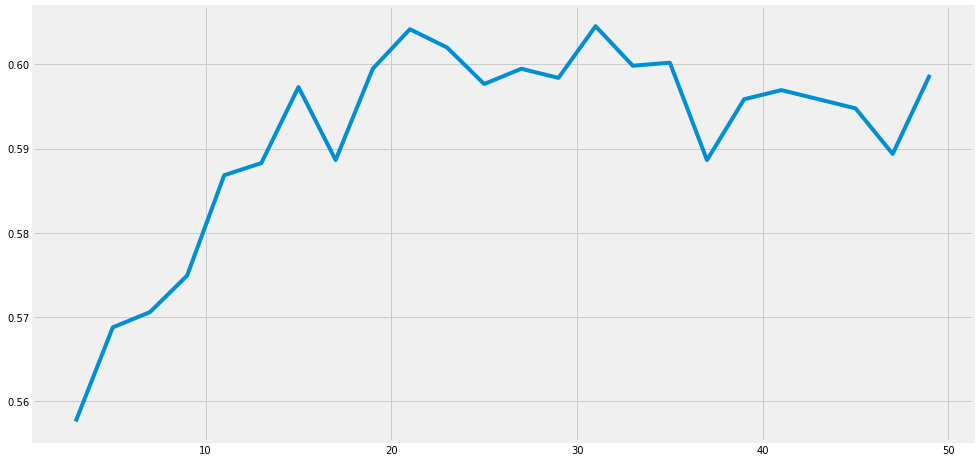

In [60]:
#Answer

neighbors = range(3, 51, 2)

cross_val_scores = []

for neighbor in neighbors:
    score = cross_val_score(KNeighborsClassifier(n_neighbors=neighbor), X, y, cv=5, scoring="accuracy").mean()
    cross_val_scores.append(score)
    
plt.plot(neighbors, cross_val_scores)

Which neighbor value/s produces the best accuracy score?
<br><br>
How does that compare to the null accuracy?

In [79]:
knn32 = KNeighborsClassifier(n_neighbors=32)
knn32.fit(X_train, y_train)
knn32.score(X_test, y_test)

0.6031746031746031

What is the issue here? We can't seem to build a model that can significantly beat our null accuracy.
<br><br>
Think about the features and how they differ from each other.


## Scaling Data
<br><br>
[Feature scaling:](https://en.wikipedia.org/wiki/Feature_scaling) A method used to standardize the range of independent variables or features of data

Let's take a look at this sample data set.

In [62]:
#Initialize data
sample = {"income":[30000, 55000, 36000], 
          "white_pop":[50, 85, 95], 
          "college_deg":[15, 40, 50], 
          "class":["A","B", "X"]}

sample= pd.DataFrame(sample)
sample

,class,college_deg,income,white_pop
0,A,15,30000,50
1,B,40,55000,85
2,X,50,36000,95


Which class is row 2 closer to? A or B?
Let's use euclidean distance to figure that out.

In [63]:
#Assign rows in data to variables
class_A = sample.iloc[0, 1:].values
class_B = sample.iloc[1, 1:].values
class_X = sample.iloc[2, 1:].values

In [64]:
#Euclidean distance between class A and class x
np.sqrt(((class_A-class_X)**2).sum())

6000.270827221051

In [65]:
#Euclidean distance between class B and class x
np.sqrt(((class_B-class_X)**2).sum())

19000.005263157167

Which class should class_X be assigned to based on this calculation? Do you agree or disagree

This example demonstrates the necessity of feature scaling.

From [Sebastian Raschka](http://sebastianraschka.com/Articles/2014_about_feature_scaling.html)

<b>Standardization</b>: "The result of standardization (or Z-score normalization) is that the features will be rescaled so that they’ll have the properties of a standard normal distribution with μ=0μ=0  and σ=1

Where μ is the mean (average) and σσ is the standard deviation from the mean; standard scores (also called z scores) of the samples are calculated as follows:"
![e](http://www.statisticshowto.com/wp-content/uploads/2016/11/alternate-z-score.png)
<br><br>
<b>MinMax Scaling</b>: "An alternative approach to Z-score normalization (or standardization) is the so-called Min-Max scaling (often also simply called “normalization” - a common cause for ambiguities).
In this approach, the data is scaled to a fixed range - usually 0 to 1.
The cost of having this bounded range - in contrast to standardization - is that we will end up with smaller standard deviations, which can suppress the effect of outliers.

A Min-Max scaling is typically done via the following equation:"
![d](https://qph.ec.quoracdn.net/main-qimg-0d692d88876aeb26b1f1a578d1c5a94e)

Let's scale the features using StandardScaler and MinMaxScaler

In [93]:
#Imports
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [94]:
#Intialize scalers

ss = StandardScaler()
mm = MinMaxScaler()

#Fit data on scalers
ss.fit(X)

mm.fit(X)

MinMaxScaler(copy=True, feature_range=(0, 1))

We don't have any data yet, we need then transform the data using the fit scalers

In [95]:
#Use ss and mm to transform X

Xss = ss.transform(X)
Xmm = mm.transform(X)

We can fit and transform at the same time

In [96]:
#Intialize scalers
ss = StandardScaler()
mm = MinMaxScaler()

#Fit and transform data using scalers
X_ss =  ss.fit_transform(X)
X_mm = mm.fit_transform(X)

In [97]:
type(X_ss)

numpy.ndarray

In [98]:
#Make data frames from scaled data. Use columns from X

X_ss = pd.DataFrame(data=X_ss, columns=X.columns, index=df.index)
X_mm = pd.DataFrame(data=X_mm, columns=X.columns, index=df.index)

In [99]:
#Take a look at both data frames
X_ss.head()

,population,pop_change,senior_pop_per,female_pop_per,black_pop_per,white_pop_per,foreign_pop_per,college_degree_pop_,commute_time,median_income,poverty_rate,pop_density
fips,,,,,,,,,,,,
1001,-0.148823,0.278481,-0.851504,0.622683,0.565499,-0.027820,-0.527947,0.178889,0.518359,0.721738,-0.795982,-0.097887
1003,0.293712,2.412106,0.273221,0.535213,-0.039386,0.342080,-0.170632,0.950101,0.461523,0.429408,-0.518507,-0.085256
1005,-0.235999,-0.646947,-0.231757,-1.476598,2.486508,-1.477430,-0.295692,-0.671712,0.215234,-1.032661,1.454647,-0.131570
1007,-0.249396,-0.569828,-0.621968,-1.782744,0.791500,-0.082805,-0.599411,-0.819149,0.783594,-0.733997,0.128934,-0.128357
1009,-0.141716,0.072830,-0.116989,0.229068,-0.557859,0.582016,-0.045571,-0.819149,1.977151,-0.083794,-0.225617,-0.099494


In [100]:
X_mm.head()

,population,pop_change,senior_pop_per,female_pop_per,black_pop_per,white_pop_per,foreign_pop_per,college_degree_pop_,commute_time,median_income,poverty_rate,pop_density
fips,,,,,,,,,,,,
1001,0.005467,0.454545,0.198770,0.797753,0.219741,0.759162,0.031189,0.248596,0.500000,0.329539,0.214149,0.001320
1003,0.019772,0.658477,0.299180,0.790262,0.112808,0.836649,0.070175,0.344101,0.491667,0.295691,0.248566,0.001648
1005,0.002649,0.366093,0.254098,0.617978,0.559342,0.455497,0.056530,0.143258,0.455556,0.126403,0.493308,0.000445
1007,0.002216,0.373464,0.219262,0.591760,0.259694,0.747644,0.023392,0.125000,0.538889,0.160985,0.328872,0.000528
1009,0.005697,0.434889,0.264344,0.764045,0.021152,0.886911,0.083821,0.125000,0.713889,0.236269,0.284895,0.001278


In [101]:
#What happens when you call .describe() on X_ss
X_ss.describe()

,population,pop_change,senior_pop_per,female_pop_per,black_pop_per,white_pop_per,foreign_pop_per,college_degree_pop_,commute_time,median_income,poverty_rate,pop_density
count,2.769000e+03,2.769000e+03,2.769000e+03,2.769000e+03,2.769000e+03,2.769000e+03,2.769000e+03,2.769000e+03,2.769000e+03,2.769000e+03,2.769000e+03,2.769000e+03
mean,-4.270089e-18,-1.368834e-16,5.410784e-16,1.488196e-15,-5.244390e-17,-1.033843e-16,-4.972247e-17,3.570436e-17,7.334128e-16,1.133277e-16,2.190776e-16,7.467643e-18
std,1.000181e+00,1.000181e+00,1.000181e+00,1.000181e+00,1.000181e+00,1.000181e+00,1.000181e+00,1.000181e+00,1.000181e+00,1.000181e+00,1.000181e+00,1.000181e+00
min,-3.179549e-01,-4.477190e+00,-3.078000e+00,-8.692878e+00,-6.775061e-01,-3.651845e+00,-8.138002e-01,-1.828529e+00,-2.891802e+00,-2.124356e+00,-2.522492e+00,-1.486885e-01
25%,-2.799873e-01,-6.212409e-01,-6.219680e-01,-1.645473e-01,-6.176823e-01,-5.976668e-01,-5.994107e-01,-6.943944e-01,-6.941425e-01,-6.461542e-01,-6.880754e-01,-1.372763e-01
50%,-2.349804e-01,-1.585270e-01,-9.403586e-02,1.853329e-01,-4.847405e-01,3.370815e-01,-3.671553e-01,-2.634232e-01,-6.894627e-02,-1.466350e-01,-1.022952e-01,-1.218199e-01
75%,-9.862318e-02,4.841312e-01,5.257105e-01,4.914781e-01,1.733212e-01,8.269496e-01,1.866843e-01,3.830336e-01,6.320314e-01,4.408955e-01,5.605612e-01,-8.054745e-02
max,3.061820e+01,5.985285e+00,8.123342e+00,2.984375e+00,4.979166e+00,1.121870e+00,8.351353e+00,6.246510e+00,3.928521e+00,6.512241e+00,5.539692e+00,3.833573e+01


What do you notice about the means and standard deviations?

What happens when we receive new data? How do we scale it using the scale of our previous data?

In [102]:
#Select San Francisco and Santa Cruz counties
ba = county[(county.fips==6075) | (county.fips==6087)].drop("fips", axis=1)
ba

,population,pop_change,senior_pop_per,female_pop_per,black_pop_per,white_pop_per,foreign_pop_per,college_degree_pop_,commute_time,median_income,poverty_rate,pop_density
229,852469,5.9,14.4,49.1,5.8,41.2,35.6,52.4,30.5,75604,13.5,17179.1
235,271804,3.6,13.5,50.4,1.4,58.2,18.3,37.0,25.4,66519,14.6,589.4


In [103]:
#Use the ss scaler object used to fit and transform X to transform ba.
ba_ss = ss.transform(ba)
ba_ss

array([[ 2.28859267,  1.4095589 , -0.71378225, -0.38322249, -0.29197498,
        -1.74735729,  5.54642291,  3.75141389,  1.33300903,  2.57335405,
        -0.58016851,  9.36834919],
       [ 0.51294611,  0.8183134 , -0.92036438,  0.18533292, -0.58444687,
        -0.89758608,  2.45564033,  2.00484635,  0.3667966 ,  1.80600006,
        -0.41060058,  0.17777926]])

In [104]:
#Use the mm scaler object used to fit and transform X to transform ba.
ba_mm = mm.transform(ba)
ba_mm

array([[0.08425572, 0.56265356, 0.21106557, 0.71161049, 0.06815511,
        0.39895288, 0.69395712, 0.69101124, 0.61944444, 0.54393068,
        0.24091778, 0.24729585],
       [0.02685858, 0.50614251, 0.19262295, 0.76029963, 0.01645123,
        0.57696335, 0.35672515, 0.4747191 , 0.47777778, 0.45508156,
        0.26195029, 0.00848312]])

Class exercise time: 

Work with partner to investigate whether or not our model significantly improves when using scaled data. Which scaler improves our modeling more? Use cross validation and charts and examine as many neighbors as possible.


In [ ]:
#Answer

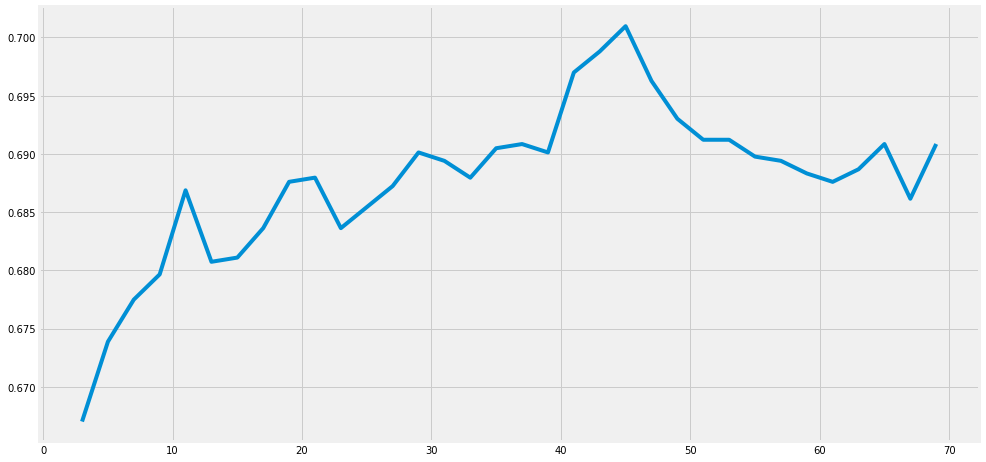

In [107]:
neighbors = range(3,71, 2)

cv_scores = []


for neighbor in neighbors:
    model = KNeighborsClassifier(n_neighbors=neighbor)
    score = cross_val_score(model, X_ss, y, scoring="accuracy", cv=5).mean()
    cv_scores.append(score)
    
plt.plot(neighbors, cv_scores)


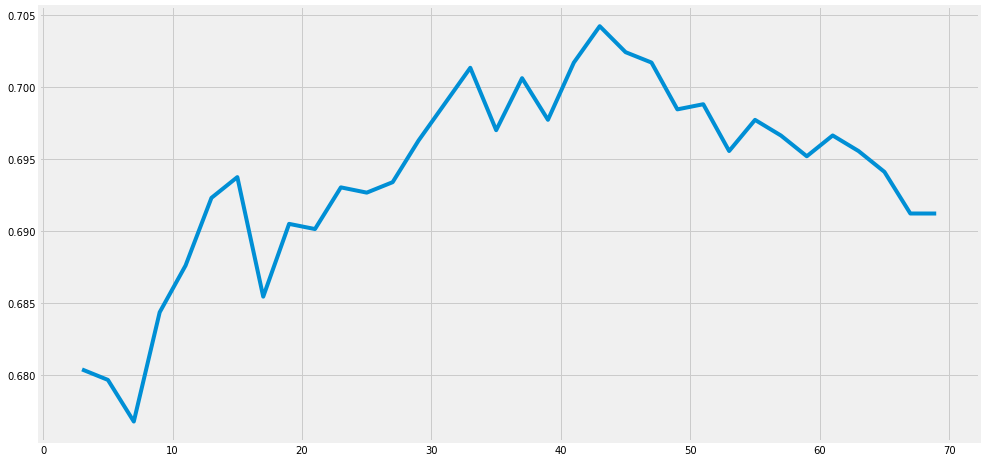

In [108]:
neighbors = range(3,71, 2)

cv_scores = []


for neighbor in neighbors:
    model = KNeighborsClassifier(n_neighbors=neighbor)
    score = cross_val_score(model, X_mm, y, scoring="accuracy", cv=5).mean()
    cv_scores.append(score)
    
plt.plot(neighbors, cv_scores)


### Resources:
<br>
KNN:
- https://kevinzakka.github.io/2016/07/13/k-nearest-neighbor/
- https://www.dataquest.io/blog/k-nearest-neighbors-in-python/
- https://saravananthirumuruganathan.wordpress.com/2010/05/17/a-detailed-introduction-to-k-nearest-neighbor-knn-algorithm/
- http://people.revoledu.com/kardi/tutorial/KNN/index.html
<br><br>

Feature scaling:

- https://machinelearningmastery.com/scale-machine-learning-data-scratch-python/
- https://www.datacamp.com/community/tutorials/preprocessing-in-data-science-part-1-centering-scaling-and-knn
- https://pythonprogramming.net/preprocessing-machine-learning/
- http://benalexkeen.com/feature-scaling-with-scikit-learn/

## In-class lab.
<br><br>
For the rest of class work on modeling one of the following datasets: primary, spotify, employee churn (HR_comma_sep.csv), iris, titanic, or use fake data from sklearn.
<br><br>
Compare and contrast decision trees with KNN. Drop and transform features. Play around as much as possible with the data and see if that improves your model.
<br><br>
Check out bonus lesson in which I use KNN-like algorithm to determine similarities between soccer players and decide which city Amazon should choose for their new headquarters.

### Spotify data

A dataset of songs I like and dislike and their attributes from Spotify. 1 = like, 0 = dislike<br><br>



<b>Attributes:</b>

        Acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
        
        Danceability: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
        
        Instrumentalness: Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
        
        Valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
        
        Energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.
        
More details: https://developer.spotify.com/web-api/get-audio-features/

My article using this dataset: https://opendatascience.com/blog/a-machine-learning-deep-dive-into-my-spotify-data/

In [ ]:
# music = pd.read_pickle("../data/Spotify_Data.pkl")
# music